<a href="https://colab.research.google.com/github/womzy/Thesis_work/blob/main/Pre_Trip_code_for_Thesis_IT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


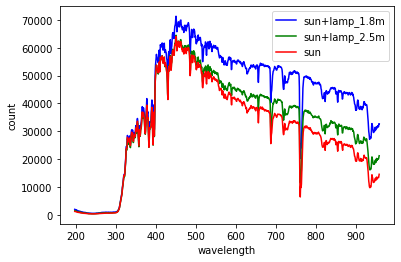

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lamp_1_8 = "/content/gdrive/MyDrive/Checking spectrum of cloudy sun (19.10.2021)/Hamamatsu spectrometer outdoors/cloudy sun and lhalogen lamp 1.8 m.txt"
lamp_2_5 = "/content/gdrive/MyDrive/Checking spectrum of cloudy sun (19.10.2021)/Hamamatsu spectrometer outdoors/cloudy sun and lhalogen lamp 2.5 m.txt"
sun = "/content/gdrive/MyDrive/Checking spectrum of cloudy sun (19.10.2021)/Hamamatsu spectrometer outdoors/cloudy sun.txt"

sun_lamp_1 = pd.read_csv(lamp_1_8, header=None)
sun_lamp_2 = pd.read_csv(lamp_2_5, header=None)
cloudy_sun = pd.read_csv(sun, header=None)

sun_lamp_1.columns = ["a"]
sun_lamp_1 = sun_lamp_1['a'].str.split('\t')
sun_lamp_2.columns = ["a"]
sun_lamp_2 = sun_lamp_2['a'].str.split('\t')
cloudy_sun.columns = ["a"]
cloudy_sun = cloudy_sun['a'].str.split('\t')

col_a = [float(sun_lamp_1[i][0]) for i in range(len(sun_lamp_1))]
col_b =[float(sun_lamp_1[i][1]) for i in range(len(sun_lamp_1))]

col_a_2 = [float(sun_lamp_2[i][0]) for i in range(len(sun_lamp_2))]
col_b_2 =[float(sun_lamp_2[i][1]) for i in range(len(sun_lamp_2))]

col_a_sun = [float(cloudy_sun[i][0]) for i in range(len(cloudy_sun))]
col_b_sun =[float(cloudy_sun[i][1]) for i in range(len(cloudy_sun))]

plt.plot(col_a, col_b, color = "blue" )
plt.plot(col_a_2, col_b_2, color ="green")
plt.plot(col_a_sun, col_b_sun, color = "red" )
plt.xlabel("wavelength")
plt.ylabel("count")
plt.legend(labels = ["sun+lamp_1.8m", "sun+lamp_2.5m","sun"])





spectral_image.shape:  (512, 204, 512)


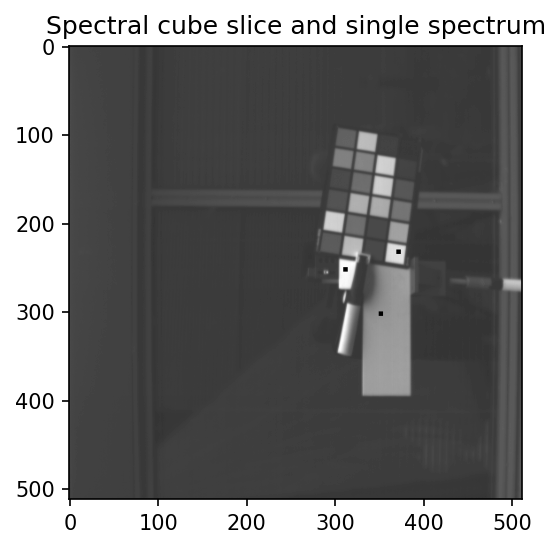

204


In [21]:
lines, bands, samples = (512,204,512)
open_path = "/content/gdrive/MyDrive/Checking spectrum of cloudy sun (19.10.2021)/Specim IQ outdoors/Specim IQ out doors no lamp/capture/092.raw"
fopen = open(open_path, "rb")
raw_image = np.fromfile(fopen, dtype=np.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image = np.reshape(raw_image, (lines, bands, samples))

demo_image = spectral_image.copy()
print('spectral_image.shape: ', spectral_image.shape)

plt.rcParams['figure.dpi'] = 150
#white reference point checkpoint
demo_image[250:255,:,310:315] = 0
#grey reference point checkpoint
demo_image[300:305,:,350:355] = 0
# white patch
demo_image[230:235,:,370:375] = 0


plt.imshow(demo_image[:,100,:], cmap="gray")
plt.title('Spectral cube slice and single spectrum')
plt.show()
print(len(spectral_image[250,:,310]))

In [18]:
wavelength = [397.32,400.20,403.09,405.97,408.85,411.74,414.63,417.52,420.40,
              423.29,426.19,429.08,431.97,434.87,437.76,440.66,443.56,446.45,
              449.35,452.25, 455.16,458.06,460.96,463.87,466.77,469.68,472.59,
              475.50,478.41,481.32,484.23, 487.14,490.06,492.97,495.89,498.80,
              501.72,504.64,507.56,510.48,513.40,516.33,519.25,522.18,525.10,
              528.03,530.96,533.89,536.82, 539.75,542.68,545.62,548.55,551.49,
              554.43,557.36,560.30,563.24,566.18,569.12,572.07,575.01,577.96,
              580.90,583.85,586.80,589.75,592.70,595.65,598.60,601.55,604.51,
              607.46,610.42,613.38,616.34,619.30,622.26,625.22,628.18,631.15,
              634.11,637.08,640.04,643.01,645.98,648.95,651.92,654.89,657.87,
              660.84,663.81,666.79,669.77,672.75,675.73,678.71,681.69,684.67,
              687.65,690.64,693.62,696.61,699.60,702.58,705.57,708.57,711.56,
              714.55,717.54,720.54,723.53,726.53,729.53,732.53,735.53,738.53,
              741.53,744.53,747.54,750.54,753.55,756.56,759.56,762.57,765.58,
              768.60,771.61,774.62,777.64,780.65,783.67,786.68,789.70,792.72,
              795.74,798.77,801.79,804.81,807.84,810.86,813.89,816.92,819.95,
              822.98,826.01,829.04,832.07,835.11,838.14,841.18,844.22,847.25,
              850.29,853.33,856.37,859.42,862.46,865.50,868.55,871.60,874.64,
              877.69,880.74,883.79,886.84,889.90,892.95,896.01,899.06,902.12,
              905.18,908.24,911.30,914.36,917.42,920.48,923.55,926.61,929.68,
              932.74,935.81,938.88,941.95,945.02,948.10,951.17,954.24,957.32,
              960.40,963.47,966.55,969.63,972.71,975.79,978.88,981.96,985.05,
              988.13,991.22,994.31,997.40,1000.49,1003.58]

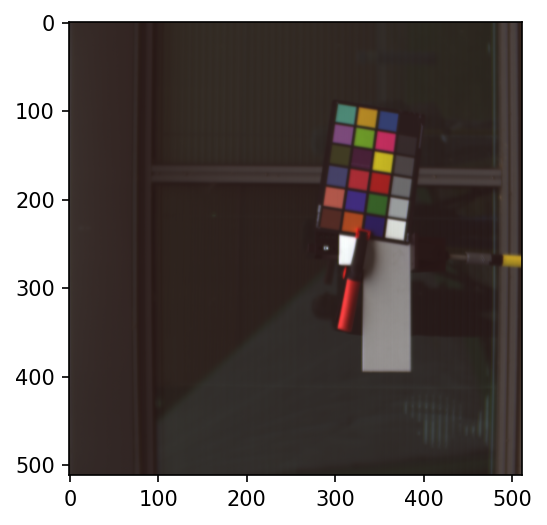

In [19]:
# Plot RGB preview
plt.rcParams['figure.dpi'] = 150
RGB = np.empty((lines,samples, 3), dtype = np.float32)
ch1 = 88 # Red
ch2 = 54  # Green
ch3 = 20  # Blue
RGB[:,:,0] = spectral_image[:,ch1,:]/ np.amax(spectral_image[:,ch1,:]) #normalization
RGB[:,:,1] = spectral_image[:,ch2,:]/ np.amax(spectral_image[:,ch2,:])
RGB[:,:,2] = spectral_image[:,ch3,:]/ np.amax(spectral_image[:,ch3,:])

plt.imshow(RGB)
plt.show()

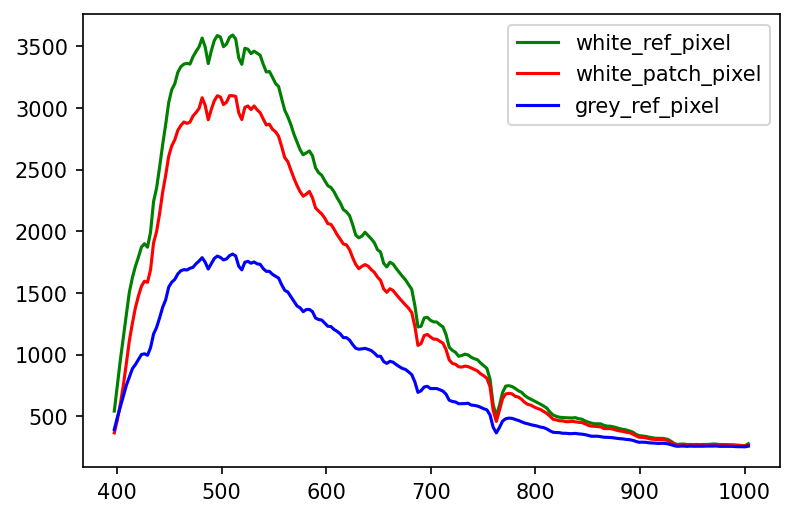

In [25]:
#plot before white correction
white_ref_pixel = spectral_image[250,:,310]
white_patch_pixel = spectral_image[230,:,370]
grey_ref_pixel = spectral_image[300,:,350]

plt.rcParams['figure.dpi'] = 150
plt.plot(wavelength, white_ref_pixel, "g")
plt.plot(wavelength, white_patch_pixel, "r")
plt.plot(wavelength, grey_ref_pixel, "b")
plt.legend(labels = ["white_ref_pixel", "white_patch_pixel","grey_ref_pixel"])
plt.show()

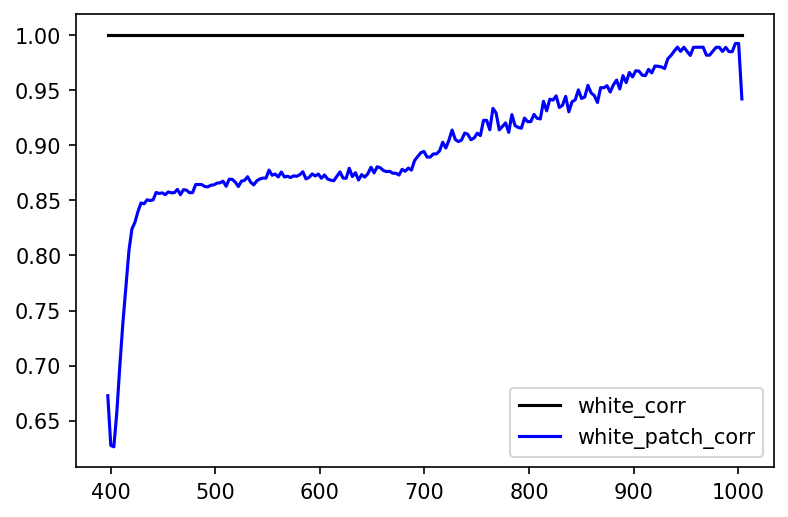

In [26]:
#plot after white correction
white_corr = white_ref_pixel/white_ref_pixel
white_patch_corr = white_patch_pixel/white_ref_pixel

plt.rcParams['figure.dpi'] = 150
plt.plot(wavelength, white_corr, "black")
plt.plot(wavelength, white_patch_corr, "b")
plt.legend(labels = ["white_corr", "white_patch_corr"])
plt.show()

(512, 204, 512)


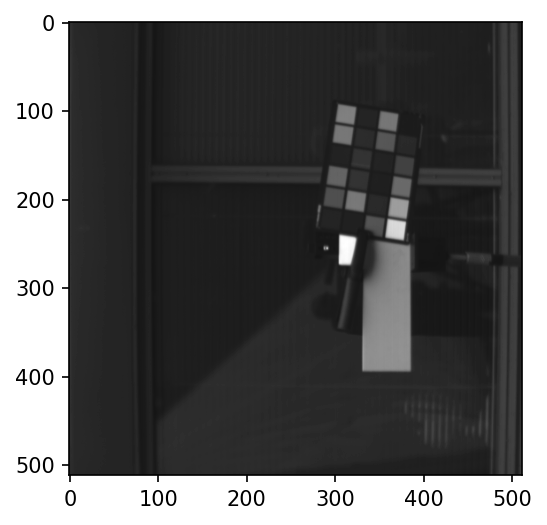

In [35]:
#white correction for whole spectral image

print(spectral_image.shape)
white_ref_pixel.shape

spectral_corrected = np.empty((lines,bands,samples), dtype = np.float32)
for i in range(0,lines):
  for j in range(0,samples):
    spectral_corrected[i,:,j] = spectral_image[i,:,j]/white_ref_pixel 

plt.imshow(spectral_corrected[:,23,:], cmap = "gray", vmin =0, vmax =np.amax(spectral_corrected[:,23,:]))


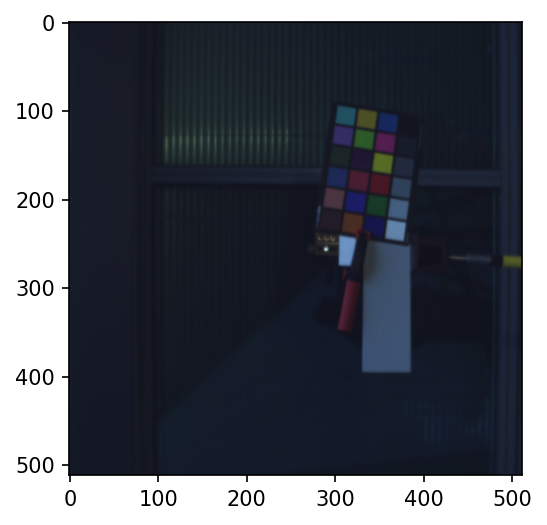

In [42]:
#same work as before but with halogen lamp (no saturation)
#ns stands for no saturation

lamp_no_saturation = "/content/gdrive/MyDrive/Checking spectrum of cloudy sun (19.10.2021)/Specim IQ outdoors/Specim IQ out doors + lamp (not saturated)/capture/094.raw"

fopen_ns = open(lamp_no_saturation, "rb")
raw_image_ns = np.fromfile(fopen_ns, dtype=np.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image_ns = np.reshape(raw_image_ns, (lines, bands, samples))


#RGB PREVIEW NO SATURATION

plt.rcParams['figure.dpi'] = 150
RGB_ns = np.empty((lines,samples, 3), dtype = np.float32)
ch1 = 88 # Red
ch2 = 54  # Green
ch3 = 20  # Blue
RGB_ns[:,:,0] = spectral_image_ns[:,ch1,:]/ np.amax(spectral_image_ns[:,ch1,:]) #normalization
RGB_ns[:,:,1] = spectral_image_ns[:,ch2,:]/ np.amax(spectral_image_ns[:,ch2,:])
RGB_ns[:,:,2] = spectral_image_ns[:,ch3,:]/ np.amax(spectral_image_ns[:,ch3,:])

plt.imshow(RGB_ns)
plt.show()




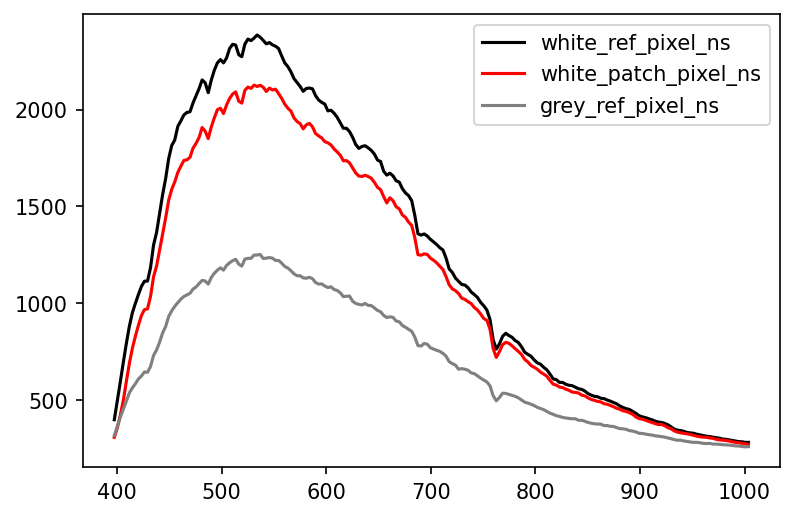

In [49]:
#plot before white correction (not saturated)
white_ref_pixel_ns = spectral_image_ns[250,:,310]
white_patch_pixel_ns = spectral_image_ns[230,:,370]
grey_ref_pixel_ns = spectral_image_ns[300,:,350]

plt.rcParams['figure.dpi'] = 150
plt.plot(wavelength, white_ref_pixel_ns, "black")
plt.plot(wavelength, white_patch_pixel_ns, "r")
plt.plot(wavelength, grey_ref_pixel_ns, "gray")
plt.legend(labels = ["white_ref_pixel_ns", "white_patch_pixel_ns","grey_ref_pixel_ns"])
plt.show()

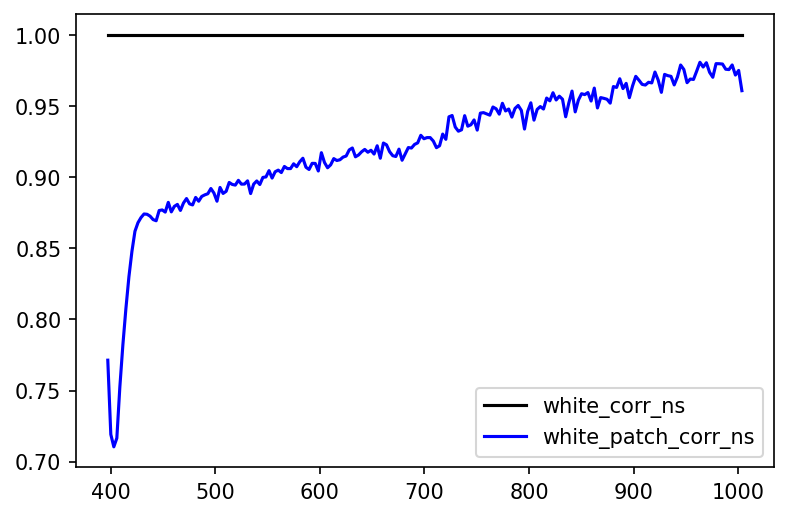

In [44]:
#plot after white correction (not saturated)
white_corr_ns = white_ref_pixel_ns/white_ref_pixel_ns
white_patch_corr_ns = white_patch_pixel_ns/white_ref_pixel_ns

plt.rcParams['figure.dpi'] = 150
plt.plot(wavelength, white_corr_ns, "black")
plt.plot(wavelength, white_patch_corr_ns, "b")
plt.legend(labels = ["white_corr_ns", "white_patch_corr_ns"])
plt.show()

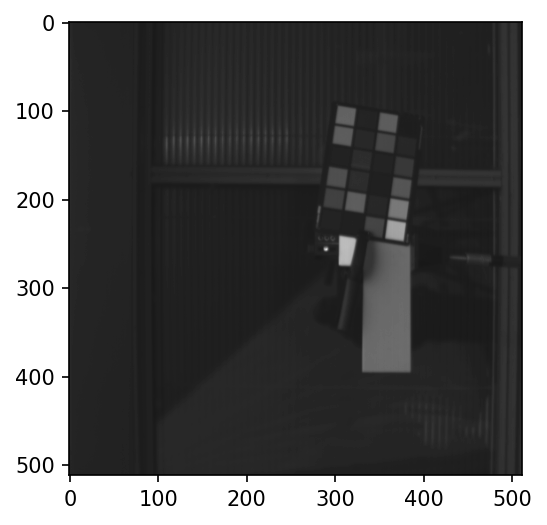

In [45]:
#white correction for whole spectral image (not saturated)


spectral_corrected_ns = np.empty((lines,bands,samples), dtype = np.float32)
for i in range(0,lines):
  for j in range(0,samples):
    spectral_corrected_ns[i,:,j] = spectral_image_ns[i,:,j]/white_ref_pixel_ns 

plt.imshow(spectral_corrected_ns[:,23,:], cmap = "gray", vmin =0, vmax =np.amax(spectral_corrected_ns[:,23,:]))


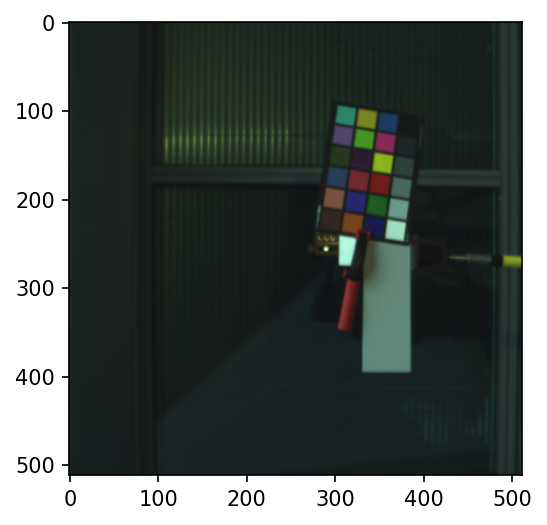

In [46]:
#same work as before but with halogen lamp (saturation)
#s stands for saturation

lamp_saturation = "/content/gdrive/MyDrive/Checking spectrum of cloudy sun (19.10.2021)/Specim IQ outdoors/Specim IQ out doors + lamp (saturated)/capture/093.raw"

fopen_s = open(lamp_saturation, "rb")
raw_image_s = np.fromfile(fopen_s, dtype=np.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image_s = np.reshape(raw_image_s, (lines, bands, samples))


#RGB PREVIEW SATURATION

plt.rcParams['figure.dpi'] = 150
RGB_s = np.empty((lines,samples, 3), dtype = np.float32)
ch1 = 88 # Red
ch2 = 54  # Green
ch3 = 20  # Blue
RGB_s[:,:,0] = spectral_image_s[:,ch1,:]/ np.amax(spectral_image_s[:,ch1,:]) #normalization
RGB_s[:,:,1] = spectral_image_s[:,ch2,:]/ np.amax(spectral_image_s[:,ch2,:])
RGB_s[:,:,2] = spectral_image_s[:,ch3,:]/ np.amax(spectral_image_s[:,ch3,:])

plt.imshow(RGB_s)
plt.show()

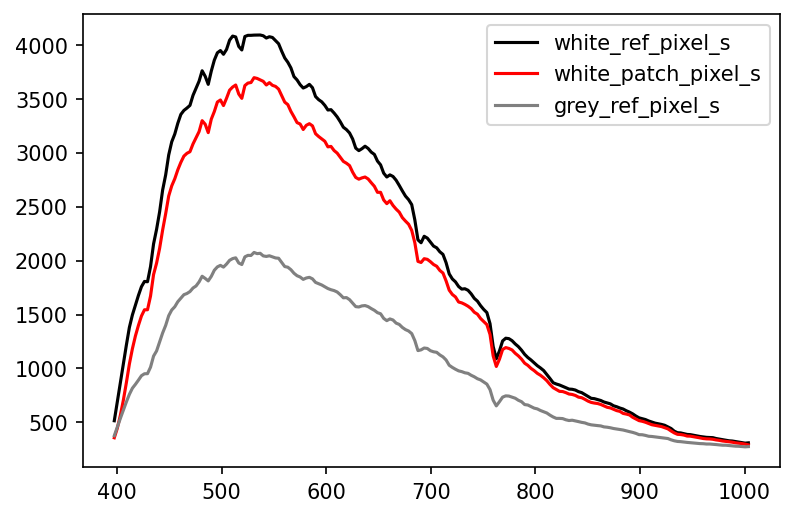

In [48]:
#plot before white correction (saturated)
white_ref_pixel_s = spectral_image_s[250,:,310]
white_patch_pixel_s = spectral_image_s[230,:,370]
grey_ref_pixel_s = spectral_image_s[300,:,350]

plt.rcParams['figure.dpi'] = 150
plt.plot(wavelength, white_ref_pixel_s, "black")
plt.plot(wavelength, white_patch_pixel_s, "r")
plt.plot(wavelength, grey_ref_pixel_s, "gray")
plt.legend(labels = ["white_ref_pixel_s", "white_patch_pixel_s","grey_ref_pixel_s"])
plt.show()

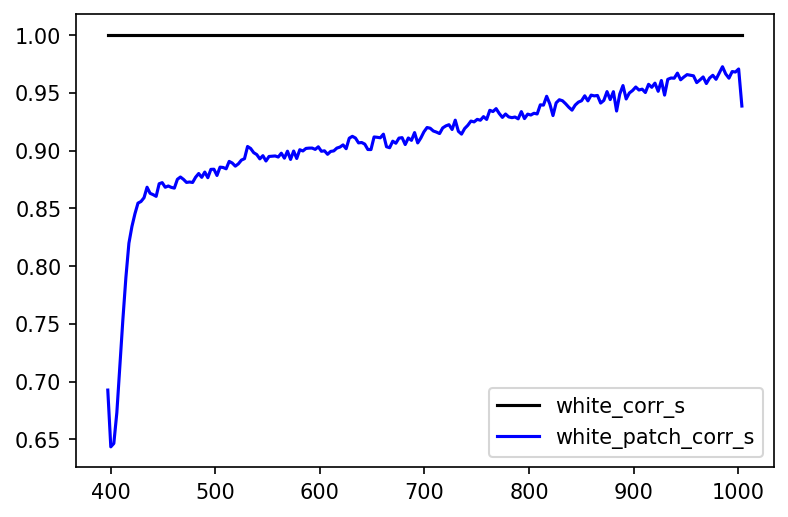

In [50]:
#plot after white correction (saturated)
white_corr_s = white_ref_pixel_s/white_ref_pixel_s
white_patch_corr_s = white_patch_pixel_s/white_ref_pixel_s

plt.rcParams['figure.dpi'] = 150
plt.plot(wavelength, white_corr_s, "black")
plt.plot(wavelength, white_patch_corr_s, "b")
plt.legend(labels = ["white_corr_s", "white_patch_corr_s"])
plt.show()

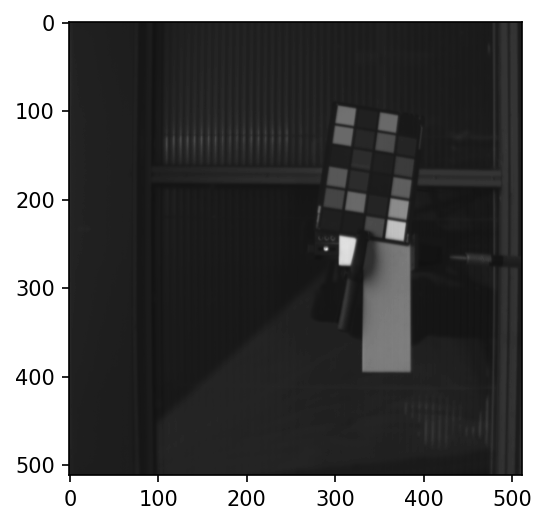

In [51]:
#white correction for whole spectral image (saturated)


spectral_corrected_s = np.empty((lines,bands,samples), dtype = np.float32)
for i in range(0,lines):
  for j in range(0,samples):
    spectral_corrected_s[i,:,j] = spectral_image_s[i,:,j]/white_ref_pixel_s 

plt.imshow(spectral_corrected_s[:,23,:], cmap = "gray", vmin =0, vmax =np.amax(spectral_corrected_s[:,23,:]))


In [55]:
wavelength_c = [323.87,328.69,333.51,338.33,343.16,347.99,
352.83,357.67,362.52,367.37,372.22,377.08,381.94,386.80,
391.67,396.55,401.43,406.31,411.20,416.09,420.98,425.88,
430.78,435.69,440.60,445.52,450.44,455.36,460.29,465.22,
470.16,475.10,480.05,484.99,489.95,494.90,499.87,504.83,
509.80,514.77,519.75,524.73,529.72,534.71,539.71,544.70,
549.71,554.71,559.73,564.74,569.76,574.78,579.81,584.84,
589.88,594.92,599.96,605.01,610.06,615.12,620.18,625.25,
630.31,635.39,640.47,645.55,650.63,655.72,660.82,665.91,
671.02,676.12,681.23,686.35,691.47,696.59,701.72,706.85,
711.98,717.12,722.27,727.41,732.57,737.72,742.88,748.05,
753.22,758.39,763.57,768.75,773.93,779.12,784.31,789.51,
794.71,799.92,805.13,810.34,815.56,820.78,826.01,831.24,
836.48,841.71,846.96,852.21,857.46,862.71,867.97,873.24,
878.50,883.78,889.05,894.33,899.62,904.91,910.20,915.50,
920.80,926.10,931.41,936.72,942.04,947.36,952.69,958.02,
963.35,968.69,974.04,979.38,984.73,990.09,995.45,1000.81,
1006.18]

len(wavelength_c)

135

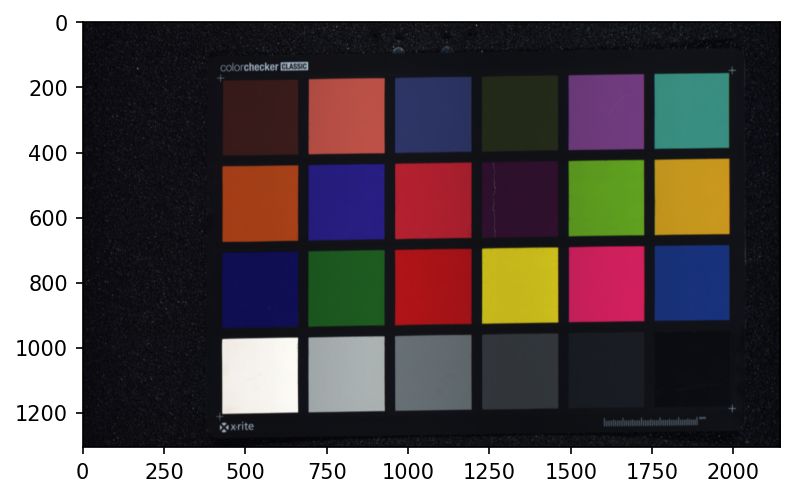

In [59]:
#BIG COLOR CHECKER (Perfect Illumination with SPECIM Line Scanner)
colorchecker_path = "/content/gdrive/MyDrive/BigColorChecker/capture/BigColorChecker.raw"
#colorchecker_path= "/content/gdrive/MyDrive/BigColorChecker/capture/WHITEREF_BigColorChecker_sample_0013.raw"

lines_c, bands_c, samples_c = (1307, 135, 2144)

fopen_c = open(colorchecker_path, "rb")
raw_image_c = np.fromfile(fopen_c, dtype=np.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image_c = np.reshape(raw_image_c, (lines_c, bands_c, samples_c))

#RGB PREVIEW COLORCHECKER

plt.rcParams['figure.dpi'] = 150
RGB_c = np.empty((lines_c,samples_c, 3), dtype = np.float32)
ch1_c = 67 # Red
ch2_c = 48  # Green
ch3_c = 27  # Blue
RGB_c[:,:,0] = spectral_image_c[:,ch1_c,:]/ np.amax(spectral_image_c[:,ch1_c,:]) #normalization
RGB_c[:,:,1] = spectral_image_c[:,ch2_c,:]/ np.amax(spectral_image_c[:,ch2_c,:])
RGB_c[:,:,2] = spectral_image_c[:,ch3_c,:]/ np.amax(spectral_image_c[:,ch3_c,:])

plt.imshow(RGB_c)
plt.show()


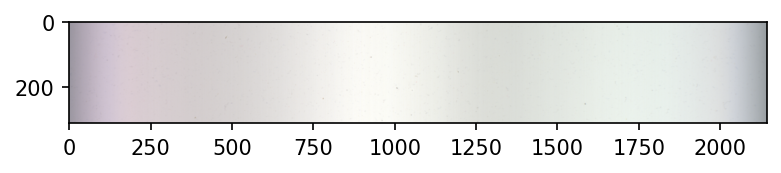

In [60]:
#cw for colorchecker white reference from specim
colorchecker_path_cw= "/content/gdrive/MyDrive/BigColorChecker/capture/WHITEREF_BigColorChecker_sample_0013.raw"

lines_cw, bands_cw, samples_cw = (311, 135, 2144)

fopen_cw = open(colorchecker_path_cw, "rb")
raw_image_cw = np.fromfile(fopen_cw, dtype=np.uint16) #uint16 float32 #count=spatial_pixels*sample_lines*spectral_bands
spectral_image_cw = np.reshape(raw_image_cw, (lines_cw, bands_cw, samples_cw))
#RGB PREVIEW COLORCHECKER white ref

plt.rcParams['figure.dpi'] = 150
RGB_cw = np.empty((lines_cw,samples_cw, 3), dtype = np.float32)
ch1_cw = 67 # Red
ch2_cw = 48  # Green
ch3_cw = 27  # Blue
RGB_cw[:,:,0] = spectral_image_cw[:,ch1_cw,:]/ np.amax(spectral_image_cw[:,ch1_cw,:]) #normalization
RGB_cw[:,:,1] = spectral_image_cw[:,ch2_cw,:]/ np.amax(spectral_image_cw[:,ch2_cw,:])
RGB_cw[:,:,2] = spectral_image_cw[:,ch3_cw,:]/ np.amax(spectral_image_cw[:,ch3_cw,:])

plt.imshow(RGB_cw)
plt.show()


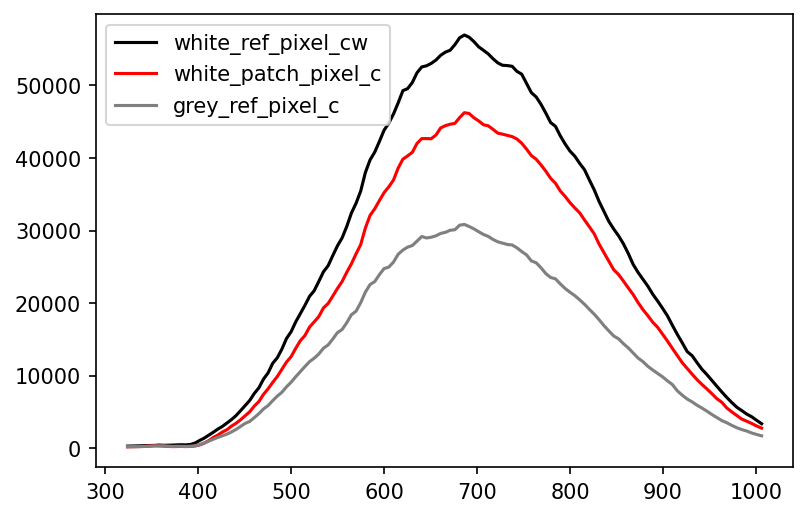

In [61]:
#WHITE CORRECTION FOR BIG COLOR CHECKER
#plot before white correction (big colorchecker)
white_ref_pixel_cw = spectral_image_cw[200,:,1000]
white_patch_pixel_c = spectral_image_c[1100,:,500]
grey_ref_pixel_c = spectral_image_c[1100,:,750]

plt.rcParams['figure.dpi'] = 150
plt.plot(wavelength_c, white_ref_pixel_cw, "black")
plt.plot(wavelength_c, white_patch_pixel_c, "r")
plt.plot(wavelength_c, grey_ref_pixel_c, "gray")
plt.legend(labels = ["white_ref_pixel_cw", "white_patch_pixel_c","grey_ref_pixel_c"])
plt.show()

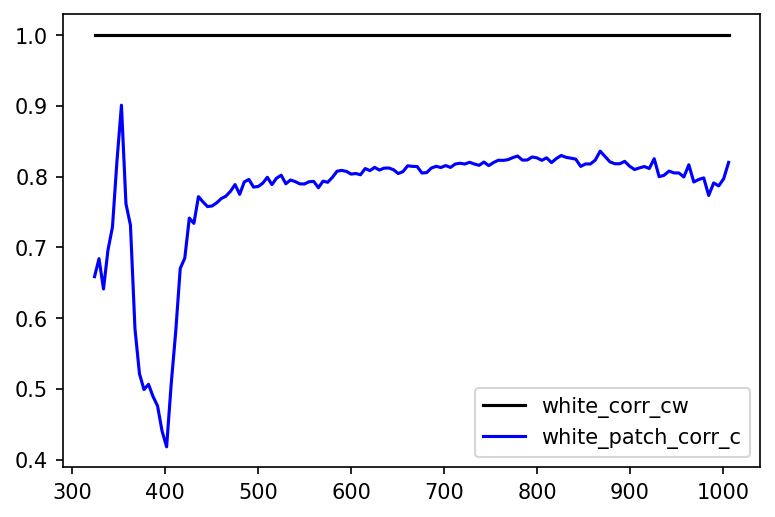

In [62]:
#plot after white correction colorchecker
white_corr_cw = white_ref_pixel_cw/white_ref_pixel_cw
white_patch_corr_c = white_patch_pixel_c/white_ref_pixel_cw

plt.rcParams['figure.dpi'] = 150
plt.plot(wavelength_c, white_corr_cw, "black")
plt.plot(wavelength_c, white_patch_corr_c, "b")
plt.legend(labels = ["white_corr_cw", "white_patch_corr_c"])
plt.show()

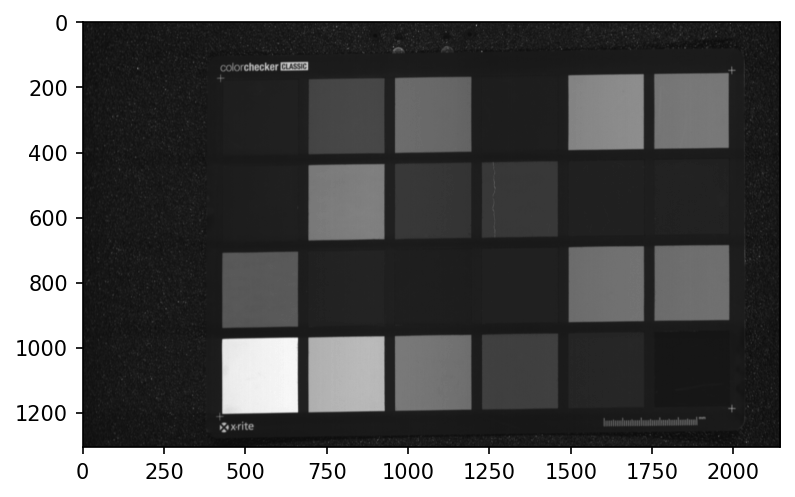

In [63]:
#white correction for whole spectral image (colorchecker)


spectral_corrected_c = np.empty((lines_c,bands_c,samples_c), dtype = np.float32)
for i in range(0,lines_c):
  for j in range(0,samples_c):
    spectral_corrected_c[i,:,j] = spectral_image_c[i,:,j]/white_ref_pixel_cw

plt.imshow(spectral_corrected_c[:,23,:], cmap = "gray", vmin =0, vmax =np.amax(spectral_corrected_c[:,23,:]))


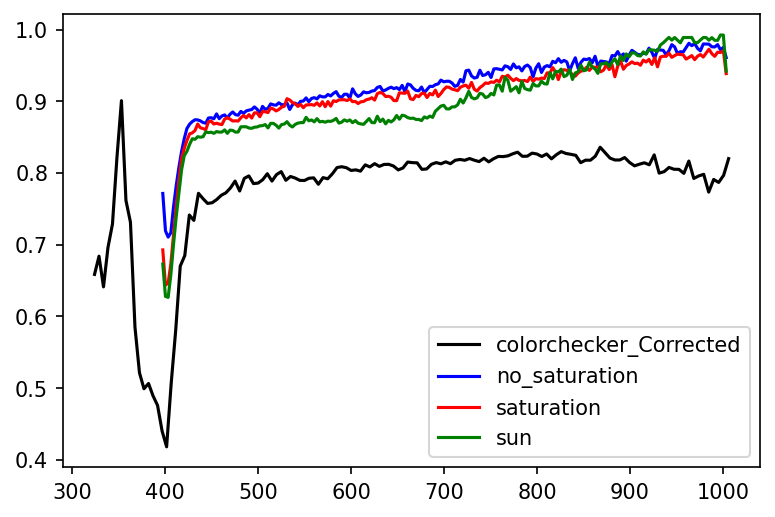

In [64]:
#PLOTTING ALL CORRECTED WHITE SPECTRA
plt.rcParams['figure.dpi'] = 150
plt.plot(wavelength_c, white_patch_corr_c, "black")
plt.plot(wavelength, white_patch_corr_ns, "b")
plt.plot(wavelength, white_patch_corr_s, "r")
plt.plot(wavelength, white_patch_corr, "g")

plt.legend(labels = ["colorchecker_Corrected", "no_saturation","saturation","sun"])
plt.show()